In [2]:
# Notebook para exploração inicial do dataset "Meteorite Landings on Earth"
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import linregress
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv("datasets/meteorite_landings_on_earth.csv", on_bad_lines='warn')
df.head(3)

,Unnamed: 0,id,meteorite_name,nametype,recclass,fall,year,mass,location,location_code,location_type,distance,latitude,longitude,lat_lng
0,1,1,Aachen,Valid,L5,Fell,1880.0,21.0,Germany,DE,land,0.0,50.7750,6.0833,"50.775,6.0833"
1,2,2,Aarhus,Valid,H6,Fell,1951.0,720.0,Denmark,DK,land,0.0,56.1833,10.2333,"56.1833,10.2333"
2,3,6,Abee,Valid,EH4,Fell,1952.0,107000.0,Canada,CA,land,0.0,54.2167,-113.0000,"54.2167,-113"


In [4]:
years_bug = [i for i in df['year'] if i >= 2016 or i <= 860 ] # pega os anos que dão problema.

index_bug = [i for i in df.index if df.loc[i, 'year'] in years_bug] # pega os índices dos elementos problemáticos.



df = df.drop(index_bug) #removendo os rows em que os anos que dão erro.



---


# **Medidas de Centralidade**


## Variável 'Year'


Média:



In [ ]:
anos_media = int(np.nanmean(df['year']))
anos_media 

1991

Mediana:

In [ ]:
anos_mediana= statistics.median(df['year'])
anos_mediana

2000.0

Moda:

In [ ]:
anos_moda = statistics.mode(df['year'])
anos_moda

2003.0



---

## Variável 'Location'
Moda:


In [ ]:
local_moda = statistics.mode(df['location'])   
local_moda

'Antarctica'

O fato da maioria das quedas de meteoros e meteoritos serem na Antártica pode estar diretamente ligado ao continente em questão estar situado em um dos polos do planeta, interferindo no centro gravitacional da região. 



---
## Variável 'Location Type'
Moda:


In [ ]:
tipoloc_moda = statistics.mode(df['location_type'])
tipoloc_moda

'land'



---
## Variável 'Mass'
Média:


In [ ]:
massa_media = int(np.nanmean(df['mass']))
massa_media

13278

Mediana:

In [ ]:
massa_mediana = statistics.median(df['mass'])
massa_mediana

30.5

Moda:

In [ ]:
massa_moda = statistics.mode(df['mass'])
massa_moda

1.3



---
# **Médias de Dispersão de Variáveis**
## Variável 'Year'
Variância:


In [ ]:
ano_varia = np.var(df['year'])
ano_varia

599.189640425593

Desvio Padrão:

In [ ]:
ano_desv = np.std(df['year'])
ano_desv

24.478350443312003



 ---
## Variável 'Mass'
Variância:


In [ ]:
massa_varia = np.var(df['mass'])
massa_varia

330626703170.9275

Desvio Padrão:

In [5]:
massa_desv = np.std(df['mass'])
massa_desv

575001.4810162905



---

# Boxplot e Seaborn
## 'Year'

<Axes: >

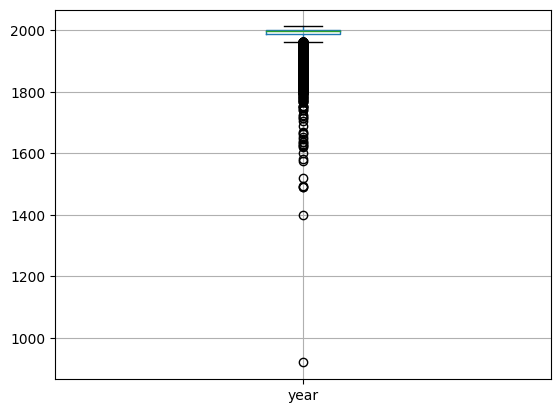

In [ ]:
df.boxplot(column='year')

<Axes: xlabel='year', ylabel='Density'>

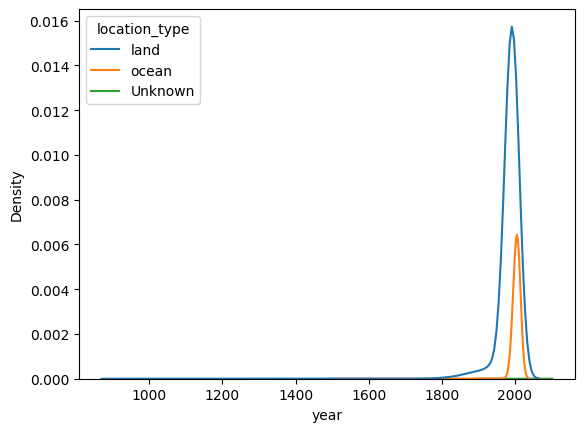

In [ ]:
sns.kdeplot(data=df, x='year', hue= 'location_type',bw_adjust= 5)



---

## 'Mass'

In [ ]:
df['log mass'] = np.log10(df['mass'])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

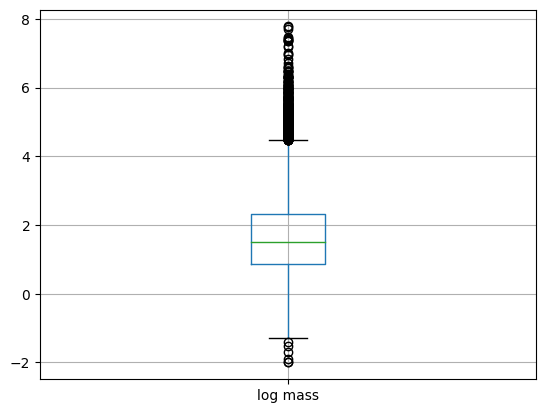

In [ ]:
df.boxplot(column='log mass')

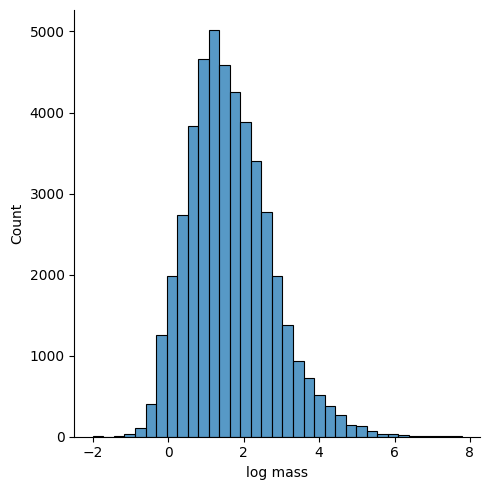

In [ ]:
sns.displot(data=df, x='log mass', bins= 35)



---

## Variável 'Location Type'

<Axes: xlabel='latitude', ylabel='longitude'>

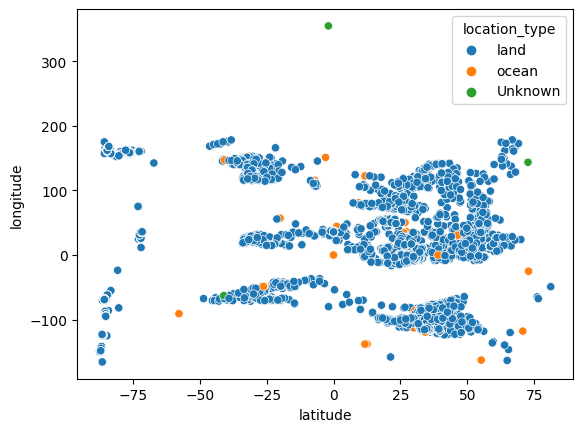

In [ ]:
sns.scatterplot(data=df, x='latitude', y='longitude', hue='location_type')



---

# Agrupamentos de Variáveis
## Agrupamentos das variáveis 'year' e 'mass'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='year', ylabel='mass'>

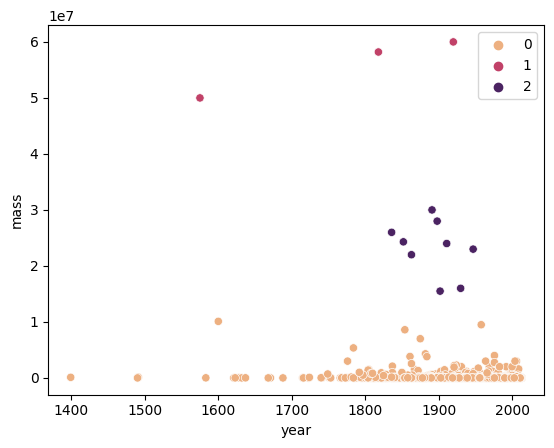

In [ ]:
df_group = df[['mass', 'year']].dropna()

kmeans_ym1 = KMeans(n_clusters=3)

kmeans_ym1.fit(df_group)

sns.scatterplot(data=df_group, x='year',y = 'mass', hue=kmeans_ym1.labels_, palette='flare')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='year', ylabel='mass'>

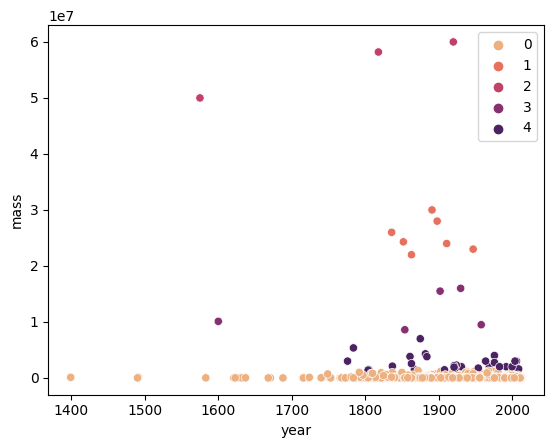

In [ ]:
df_group = df[['mass', 'year']].dropna()

kmeans_ym2 = KMeans(n_clusters=5)

kmeans_ym2.fit(df_group)

sns.scatterplot(data=df_group, x='year',y = 'mass', hue=kmeans_ym2.labels_, palette='flare')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


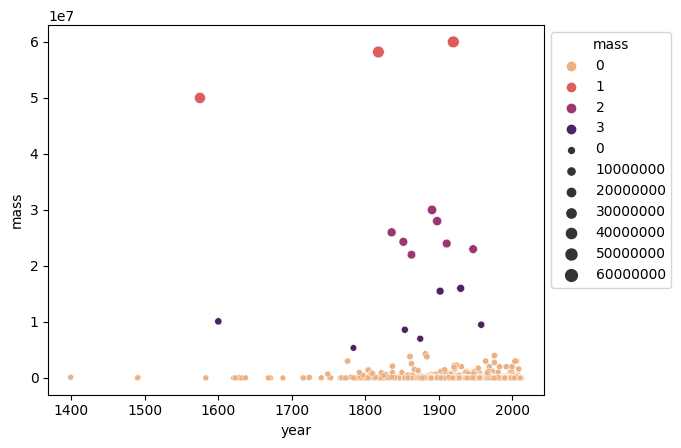

In [ ]:
kmeans_ym3 = KMeans(n_clusters=4)

kmeans_ym3.fit(df_group)

plot_3 = sns.scatterplot(data=df_group, x= 'year',y = 'mass', hue=kmeans_ym3.labels_, palette='flare', size='mass')

sns.move_legend(plot_3, "upper left", bbox_to_anchor=(1,1))



---

## Agrupamentos das variáveis 'Latitude' e 'Longitude'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


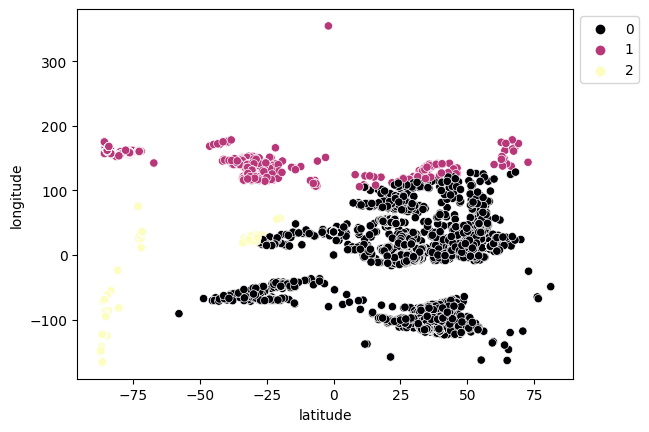

In [ ]:
df_group = df[['latitude', 'longitude']].dropna()
kmeans_LL = KMeans(n_clusters=3)

kmeans_LL.fit(df_group)

plot4 = sns.scatterplot(data=df_group, x= 'latitude',y = 'longitude', hue=kmeans_LL.labels_, palette='magma')

sns.move_legend(plot4, "upper left", bbox_to_anchor=(1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


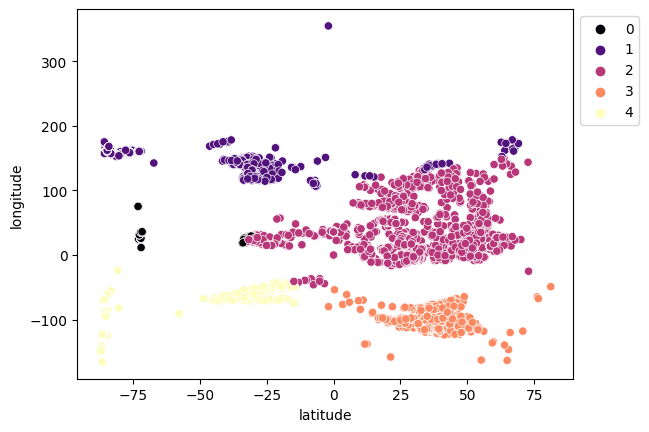

In [ ]:
kmeans_LL = KMeans(n_clusters=5)

kmeans_LL.fit(df_group)

plot4 = sns.scatterplot(data=df_group, x= 'latitude',y = 'longitude', hue=kmeans_LL.labels_, palette='magma')

sns.move_legend(plot4, "upper left", bbox_to_anchor=(1,1))



---

# Regressão Linear
## Regressão das variáveis 'year' e 'mass'


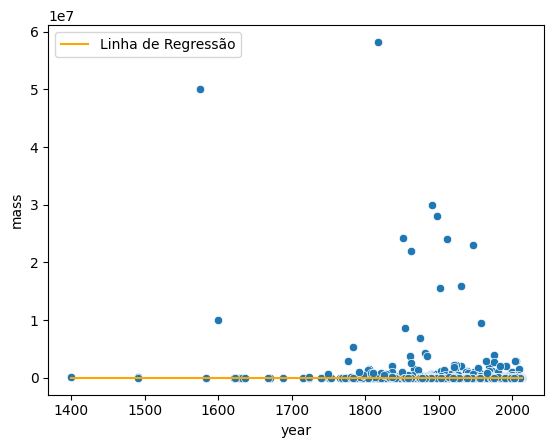

In [ ]:
df_reg = df.dropna()
def f(x, regre):
    return x*regre.slope + regre.intercept

linha_regre = linregress(df_reg['mass'], df_reg['year'])
plotreg = sns.scatterplot(data=df_reg, x= 'year',y = 'mass')
plt.plot((1399,2013), (f(1399, linha_regre), f(2013, linha_regre)), c='orange', label='Linha de Regressão')
plt.legend()
plt.show()

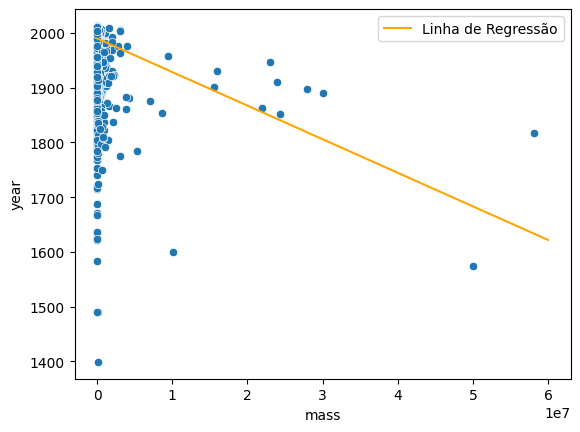

In [ ]:
linha_regre2 = linregress(df_reg['mass'], df_reg['year'])

plotreg2 = sns.scatterplot(data=df_reg, x='mass', y='year')
plt.plot((0,60000000), (f(0,linha_regre2), f(60000000,linha_regre2)), c='orange', label='Linha de Regressão')
plt.legend()
plt.show()